# Final Project Part 5

#### Table of Contents
- [EDA](#EDA)
- [Inferences](#Inferences)
- [Predictions](#Predictions)



## EDA

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


import seaborn as sns
sns.set(rc = {'axes.titlesize': 24,
             'axes.labelsize': 20,
             'xtick.labelsize': 12,
             'ytick.labelsize': 12,
             'figure.figsize': (12, 6)})

In [2]:
sic = pd.read_pickle('sic_fp2.pkl')

<AxesSubplot:title={'center':'Log Total Value Added Distribution'}, xlabel='Total Value Added', ylabel='Count'>

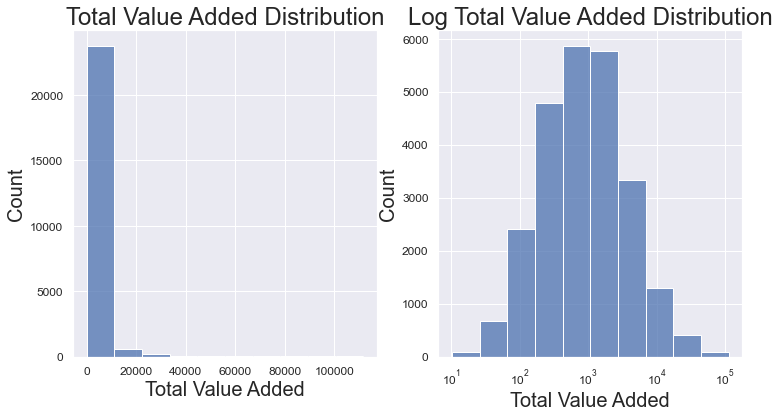

In [3]:
plt.figure()
plt.subplot(1,2,1)
plt.title('Total Value Added Distribution')
plt.xlabel('Total Value Added')
sns.histplot(x = 'vadd', data = sic, bins = 10) #checking to see if the label needs a transformation

plt.subplot(1,2,2)
plt.title('Log Total Value Added Distribution')
plt.xlabel('Total Value Added')
plt.semilogx()
sns.histplot(x = 'vadd', data = sic, bins = 10) #seeing if log transformation improves label distribution

In [4]:
#the label did indeed need a log transformation
sic['l_vadd'] = np.log(sic['vadd']) # creating new column with log transformation of label
sic = sic.drop('vadd', 1) # dropping old label

<AxesSubplot:title={'center':'Log Electricity & Fuel Cost Dist. '}, xlabel='Cost of Electricity & Fuel', ylabel='Count'>

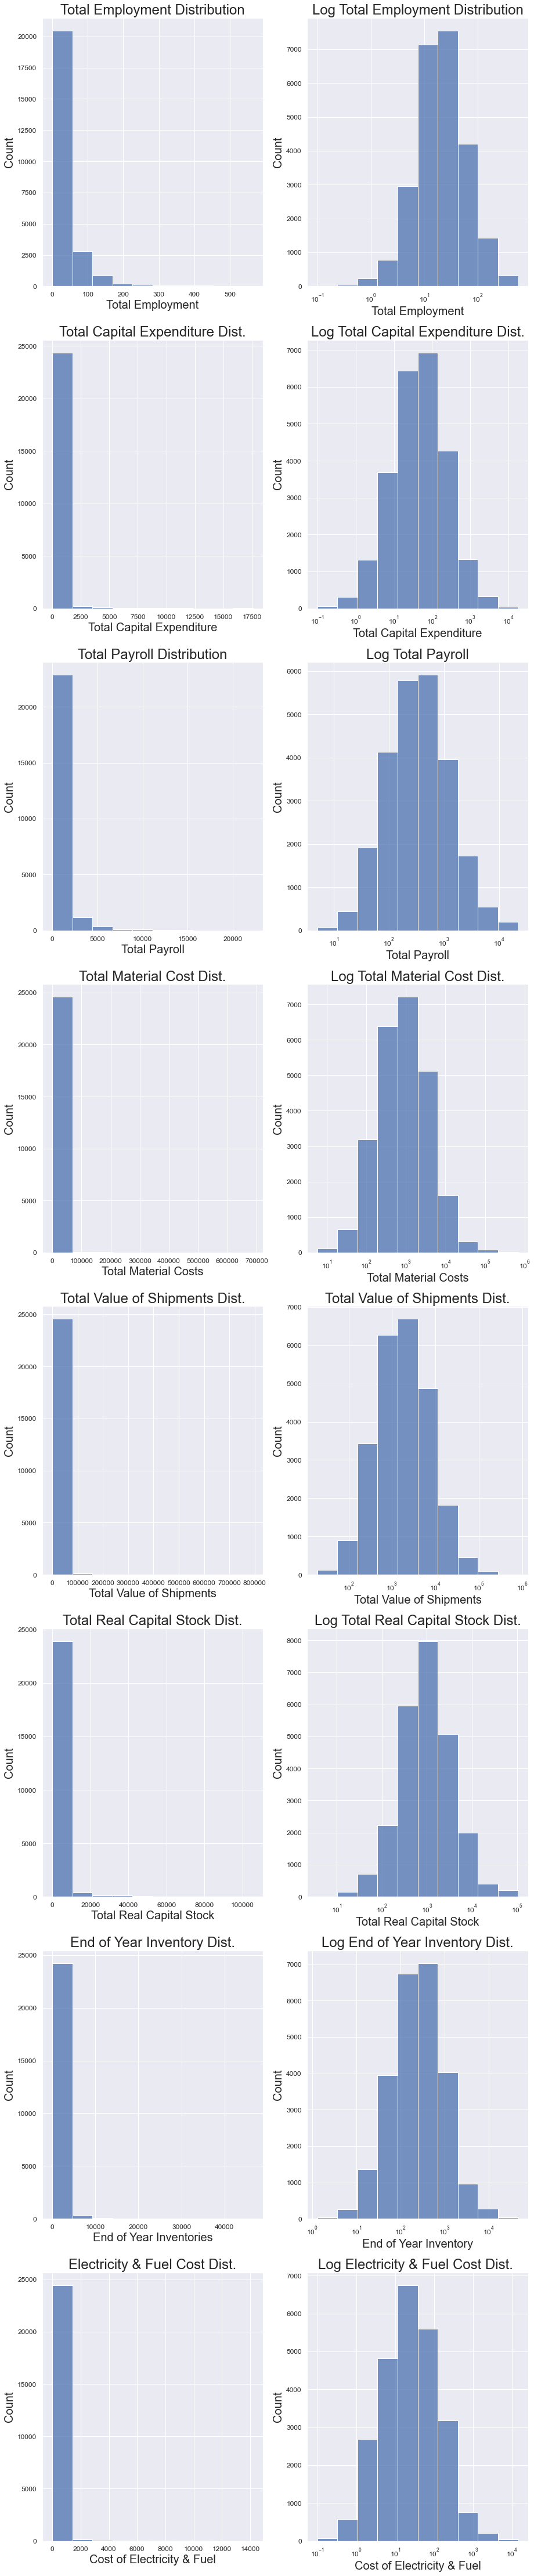

In [5]:
#checking to see if any of the features need transformations

# Histograms of emp
plt.figure(figsize = (15,80))
plt.subplot(8,2,1)
plt.title('Total Employment Distribution')
plt.xlabel('Total Employment')
sns.histplot(x = 'emp', data = sic, bins = 10)

plt.subplot(8,2,2)
plt.title('Log Total Employment Distribution')
plt.xlabel('Total Employment')
plt.semilogx()
sns.histplot(x = 'emp', data = sic, bins = 10)

#Histograms of invest
plt.subplot(8,2,3)
plt.title('Total Capital Expenditure Dist.')
plt.xlabel('Total Capital Expenditure')
sns.histplot(x = 'invest', data = sic, bins = 10)

plt.subplot(8,2,4)
plt.title('Log Total Capital Expenditure Dist.')
plt.xlabel('Total Capital Expenditure')
plt.semilogx()
sns.histplot(x = 'invest', data = sic, bins = 10)


#Histograms of pay
plt.subplot(8,2,5)
plt.title('Total Payroll Distribution')
plt.xlabel('Total Payroll')
sns.histplot(x = 'pay', data = sic, bins = 10)

plt.subplot(8,2,6)
plt.title('Log Total Payroll')
plt.xlabel('Total Payroll')
plt.semilogx()
sns.histplot(x = 'pay', data = sic, bins = 10)

#Histograms of matcost
plt.subplot(8,2,7)
plt.title('Total Material Cost Dist.')
plt.xlabel('Total Material Costs')
sns.histplot(x = 'matcost', data = sic, bins = 10)

plt.subplot(8,2,8)
plt.title('Log Total Material Cost Dist.')
plt.xlabel('Total Material Costs')
plt.semilogx()
sns.histplot(x = 'matcost', data = sic, bins = 10)

#Histograms of vship
plt.subplot(8,2,9)
plt.title('Total Value of Shipments Dist.')
plt.xlabel('Total Value of Shipments')
sns.histplot(x = 'vship', data = sic, bins = 10)

plt.subplot(8,2,10)
plt.title('Total Value of Shipments Dist.')
plt.xlabel('Total Value of Shipments')
plt.semilogx()
sns.histplot(x = 'vship', data = sic, bins = 10)

#Histograms of cap
plt.subplot(8,2,11)
plt.title('Total Real Capital Stock Dist.')
plt.xlabel('Total Real Capital Stock')
sns.histplot(x = 'cap', data = sic, bins = 10)

plt.subplot(8,2,12)
plt.title('Log Total Real Capital Stock Dist.')
plt.xlabel('Total Real Capital Stock')
plt.semilogx()
sns.histplot(x = 'cap', data = sic, bins = 10)

#Histograms of invent
plt.subplot(8,2,13)
plt.title('End of Year Inventory Dist.')
plt.xlabel('End of Year Inventories')
sns.histplot(x = 'invent', data = sic, bins = 10)

plt.subplot(8,2,14)
plt.title('Log End of Year Inventory Dist.')
plt.xlabel('End of Year Inventory')
plt.semilogx()
sns.histplot(x = 'invent', data = sic, bins = 10)

#Histograms of energy
plt.subplot(8,2,15)
plt.title('Electricity & Fuel Cost Dist.')
plt.xlabel('Cost of Electricity & Fuel')
sns.histplot(x = 'energy', data = sic, bins = 10)

plt.subplot(8,2,16)
plt.title('Log Electricity & Fuel Cost Dist. ')
plt.xlabel('Cost of Electricity & Fuel')
plt.semilogx()
sns.histplot(x = 'energy', data = sic, bins = 10)


In [6]:
#all of the features required log transformations based off of the histograms

sic['l_emp'] = np.log(sic['emp']) # creating new column with log transformation
sic = sic.drop('emp', 1) # dropping old column

sic['l_invest'] = np.log(sic['invest']) # creating new column with log transformation
sic = sic.drop('invest', 1) # dropping old column

sic['l_pay'] = np.log(sic['pay']) # creating new column with log transformation
sic = sic.drop('pay', 1) # dropping old column

sic['l_matcost'] = np.log(sic['matcost']) # creating new column with log transformation
sic = sic.drop('matcost', 1) # dropping old column

sic['l_vship'] = np.log(sic['vship']) # creating new column with log transformation
sic = sic.drop('vship', 1) # dropping old column

sic['l_cap'] = np.log(sic['cap']) # creating new column with log transformation
sic = sic.drop('cap', 1) # dropping old column

sic['l_invent'] = np.log(sic['invent']) # creating new column with log transformation
sic = sic.drop('invent', 1) # dropping old column

sic['l_energy'] = np.log(sic['energy']) # creating new column with log transformation
sic = sic.drop('energy', 1) # dropping old column

In [7]:
sic.head()

l_vadd     l_emp  l_invest     l_pay  l_matcost   l_vship  \
sic  year                                                                
2011 1958  7.466571  5.302807  4.188138  6.973356   9.233090  9.388545   
     1959  7.513818  5.284218  4.210645  7.003974   9.204232  9.374871   
     1960  7.555225  5.268889  4.346399  7.037555   9.199360  9.376380   
     1961  7.543909  5.243333  4.322807  7.041587   9.215059  9.385704   
     1962  7.593928  5.223594  4.508659  7.057123   9.259968  9.430945   

              l_cap  l_invent  l_energy  
sic  year                                
2011 1958  8.181860  6.011512  3.869116  
     1959  8.220887  5.913773  3.899950  
     1960  8.264441  5.944373  3.929863  
     1961  8.299982  5.979645  3.958907  
     1962  8.345598  6.018836  3.987130

In [8]:
sic.shape

(24676, 9)

In [9]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24676 entries, (2011, 1958) to (3999, 2011)
Data columns (total 9 columns):
l_vadd       24676 non-null float64
l_emp        24676 non-null float64
l_invest     24676 non-null float64
l_pay        24676 non-null float64
l_matcost    24676 non-null float64
l_vship      24676 non-null float64
l_cap        24676 non-null float64
l_invent     24676 non-null float64
l_energy     24676 non-null float64
dtypes: float64(9)
memory usage: 1.8 MB


## Inferences
[TOP](#Final-Project-Part-5)

In [10]:
y = sic['l_vadd']
x = sic.drop(columns = 'l_vadd')

y_train, y_test = train_test_split(y, train_size = 3/4, random_state = 490)
x_train, x_test = train_test_split(x, train_size = 3/4, random_state = 490) 

ss = StandardScaler()
x_train_std = pd.DataFrame(ss.fit(x_train).transform(x_train),
                          columns = x_train.columns,
                          index = x_train.index) 
x_test_std = pd.DataFrame(ss.fit(x_test).transform(x_test),
                          columns = x_test.columns,
                          index = x_test.index) 

x_train_std_c     = sm.add_constant(x_train_std)
x_test_std_c      = sm.add_constant(x_test_std)
x_train_c    = sm.add_constant(x_train)
x_test_c     = sm.add_constant(x_test)

C:\Users\tanse\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
param_grid = [
    {'alpha': 10**np.linspace(-7, -4, num = 10)}
]

cv_lasso = lm.Lasso(fit_intercept = False, normalize = False,
                    random_state = 490)
grid_search = GridSearchCV(cv_lasso, param_grid, cv = 5,
                         scoring = 'neg_root_mean_squared_error')
grid_search.fit(x_train_std_c, y_train)
best = grid_search.best_params_['alpha']
best

2.1544346900318822e-06

In [12]:
fit_lasso_tuned = sm.OLS(y_train, x_train_std_c).fit_regularized(alpha = best) 
beta = fit_lasso_tuned.params #fitting on non regularized standardized model
beta.index[beta == 0]
x_train_trim = x_train_std_c.loc[:, ~x_train_std_c.columns.isin(beta.index[beta == 0])]
x_test_trim = x_test_std_c.loc[:, ~x_test_std_c.columns.isin(beta.index[beta == 0])]

In [13]:
fit_std_final = sm.OLS(y_train, x_train_trim).fit() #testing on non-regularized values
fit_std_final.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.993      
Dependent Variable: l_vadd           AIC:                -26272.1018
Date:               2021-11-22 10:49 BIC:                -26201.6686
No. Observations:   18507            Log-Likelihood:     13145.     
Df Model:           8                F-statistic:        3.253e+05  
Df Residuals:       18498            Prob (F-statistic): 0.00       
R-squared:          0.993            Scale:              0.014151   
---------------------------------------------------------------------
                Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const           6.7547    0.0009  7724.5430  0.0000   6.7530   6.7564
l_emp          -0.0319    0.0019   -16.7239  0.0000  -0.0356  -0.0281
l_invest        0.0604    0.0032    19.0809  0.0000   0.0542   0.0666
l_pay           0.2437    0.0042    57.7686  0.0000   0.2354   0.2519
l_matcost      -1.2478    0.0064  -195.6550  0.0000  -1.2603  -1.2353
l_vship         2.3447    0.0089   264.7884  0.0000   2.3273   2.3620
l_cap          -0.0217    0.0025    -8.6475  0.0000  -0.0266  -0.0167
l_invent        0.0372    0.0025    14.7130  0.0000   0.0322   0.0421
l_energy       -0.0127    0.0024    -5.3406  0.0000  -0.0173  -0.0080
--------------------------------------------------------------------
Omnibus:            12515.174      Durbin-Watson:         2.025     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      310124.657
Skew:               -2.905         Prob(JB):              0.000     
Kurtosis:           22.194         Condition No.:         33        
====================================================================

"""

In [14]:
rmse_ols = np.sqrt(np.mean((y_test - fit_std_final.predict(x_test_trim))**2))
rmse_ols #metric for comparing the three models

0.11483983674229031

## Predictions
[TOP](#Final-Project-Part-5)

#### Extreme Gradient Boosting

In [15]:
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train_std, y_train, 
                                                                            train_size = 1/2,
                                                                           random_state = 490)
# setting up double train test split for gradient boosting

In [16]:
clf_xgb = xgb.XGBRegressor(n_estimators = 750, max_depth = 6, learning_rate = 0.1,
                          random_state = 490, use_label_encoder = False)
clf_xgb.fit(x_train_train, y_train_train, eval_set = [(x_train_test, y_train_test)],
           early_stopping_rounds = 5) # fitting on train train, testing on train tests

[0]	validation_0-rmse:5.77151
[1]	validation_0-rmse:5.19649
[2]	validation_0-rmse:4.67859
[3]	validation_0-rmse:4.21337
[4]	validation_0-rmse:3.79459
[5]	validation_0-rmse:3.41731
[6]	validation_0-rmse:3.07821
[7]	validation_0-rmse:2.77316
[8]	validation_0-rmse:2.49860
[9]	validation_0-rmse:2.25194
[10]	validation_0-rmse:2.02966
[11]	validation_0-rmse:1.82977
[12]	validation_0-rmse:1.65021
[13]	validation_0-rmse:1.48836
[14]	validation_0-rmse:1.34290
[15]	validation_0-rmse:1.21192
[16]	validation_0-rmse:1.09413
[17]	validation_0-rmse:0.98799
[18]	validation_0-rmse:0.89279
[19]	validation_0-rmse:0.80693
[20]	validation_0-rmse:0.72975
[21]	validation_0-rmse:0.66041
[22]	validation_0-rmse:0.59834
[23]	validation_0-rmse:0.54284
[24]	validation_0-rmse:0.49299
[25]	validation_0-rmse:0.44822
[26]	validation_0-rmse:0.40824
[27]	validation_0-rmse:0.37259
[28]	validation_0-rmse:0.34087
[29]	validation_0-rmse:0.31251
[30]	validation_0-rmse:0.28722
[31]	validation_0-rmse:0.26500
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=750, n_jobs=12, num_parallel_tree=1, random_state=490,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [17]:
xgb_n_est = clf_xgb.best_iteration #storing best iteration
xgb_n_est 

664

In [18]:
clf_xgb = xgb.XGBRegressor(n_estimators = xgb_n_est, max_depth = 5,
                          learning_rate = 0.1, random_state = 490,
                          use_label_encoder = False)
clf_xgb.fit(x_train_std, y_train) #training on full with best iteration

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=664, n_jobs=12, num_parallel_tree=1, random_state=490,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [19]:
rmse_xgb = np.sqrt(np.mean((y_test - clf_xgb.predict(x_test_std))**2))
rmse_xgb  #metric for comparing the three models

0.06475533035641769

#### Random Forest

In [20]:
clf_rf = RandomForestRegressor(n_estimators = 1000,
                          random_state = 490,
                          max_features = 'sqrt',
                          oob_score = True)
clf_rf.fit(x_train_std, y_train) # creating 1000 independent decision trees and averaging

RandomForestRegressor(max_features='sqrt', n_estimators=1000, oob_score=True,
                      random_state=490)

In [21]:
rmse_rf = np.sqrt(np.mean((y_test - clf_rf.predict(x_test_std))**2))
rmse_rf #metric for comparing the three models

0.10929388013954283